#1.0 - PRIMEIRO PASSO, IMPORTAÇÃO DOS DADOS

In [387]:
## Importação das bibliotécas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Importar o Arquivo e nomealo como dataset.csv para poder ser importado
url = 'https://raw.githubusercontent.com/ipauchner/DNC/main/kc_house_data.csv'  
dataset = pd.read_csv(url)
df = dataset

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Database detalhado:

*   ID: Identificador Único do imóvel
*   date: Data da Venda
*   price: Preço de Venda
*   bedrooms: Nº de Quartos
*   bathrooms: Nº de Banheiros
*   sqft_living: Tamanho da área Habitavel em ft²
*   sqft_lot: Tamanho do Terreno em m²
*   Floor: Numero de Andares
*   waterfront: Indicador se o imovel é a beira-mar
*   view: Grau de quão belo é a vista do imóvel (de 1 a 4)
*   condition: Condição da casa (de 1 a 5)
*   grade: Classificação por qualidade de material utilizado na construção
*   sqft_above: Área em acima do solo em ft²
*   sqft_basmt: Área em abaixo do solo em ft²
*   yr_built: Ano de construção
*   yr_renov: Ano de restauração (0 caso não tenha)
*   zipcode: CEP
*   lat: Latitude
*   long: longitude
*   squft_liv15: Média da área habitavel dos 15 imóveis mais próximos
*   squft_lot15: Méa da área do lote dos 15 imóveis mais próximos

##1.1 Verificação dos Dados importados


In [388]:
# Após importar o dataset, verificamos se há valores nulos ou em brancos, contando que há 21613 linhas
df.info()
#Com a função .info(), podemos validar se há dados em branco e o tipo de dado, se é compatível com a informação da coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Após a análise, verificamos o seguinte ponto:


1.   Coluna **DATE** como Dtype **Object**
>Deveremos alterar o tipo para **DATE_TIME**
2.   Coluna **BATHROOMS** como Dtype **Float**
>O padrão americano se consta na seguinte forma:
>> Vaso Sanitário, Pia, Chuveiro e Banheira
>>>Então, caso contenha valor fracionado, ex.: 1,25. 1,75. Significa que não há um dos itens do banheiro citados acima

###1.1.1 - Alterando o tipo da Coluna DATE

In [389]:
# Aqui alteramos o tipo de dado da coluna date para um DATE_TIME, para podermos manipular as datas do dataset
df["date"] = pd.to_datetime(df["date"])

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


###1.1.2 - Coluna Cidade

#### 1.1.2.1 - Dicionário com os ZIPCODES

In [390]:
zip_aux=[
    {"zip": 98178, "city": "Seattle"},
    {"zip": 98125, "city": "Seattle"},
    {"zip": 98028, "city": "Kenmore"},
    {"zip": 98136, "city": "Seattle"},
    {"zip": 98074, "city": "Sammamish"},
    {"zip": 98053, "city": "Redmond"},
    {"zip": 98003, "city": "Federal Way"},
    {"zip": 98198, "city": "Seattle"},
    {"zip": 98146, "city": "Seattle"},
    {"zip": 98038, "city": "Maple Valley"},
    {"zip": 98007, "city": "Bellevue"},
    {"zip": 98115, "city": "Seattle"},
    {"zip": 98107, "city": "Seattle"},
    {"zip": 98126, "city": "Seattle"},
    {"zip": 98019, "city": "Duvall"},
    {"zip": 98103, "city": "Seattle"},
    {"zip": 98002, "city": "Auburn"},
    {"zip": 98133, "city": "Seattle"},
    {"zip": 98040, "city": "Macer Island"},
    {"zip": 98092, "city": "Auburn"},
    {"zip": 98030, "city": "kent"},
    {"zip": 98119, "city": "Seattle"},
    {"zip": 98112, "city": "Seattle"},
    {"zip": 98052, "city": "Redmond"},
    {"zip": 98027, "city": "Issaquah"},
    {"zip": 98117, "city": "Seattle"},
    {"zip": 98058, "city": "Renton"},
    {"zip": 98001, "city": "Auburn"},
    {"zip": 98056, "city": "Renton"},
    {"zip": 98166, "city": "Seattle"},
    {"zip": 98023, "city": "Federal Way"},
    {"zip": 98070, "city": "Vashon"},
    {"zip": 98148, "city": "Seattle"},
    {"zip": 98105, "city": "Seattle"},
    {"zip": 98042, "city": "kent"},
    {"zip": 98008, "city": "Bellevue"},
    {"zip": 98059, "city": "Renton"},
    {"zip": 98122, "city": "Seattle"},
    {"zip": 98144, "city": "Seattle"},
    {"zip": 98004, "city": "Bellevue"},
    {"zip": 98005, "city": "Bellevue"},
    {"zip": 98034, "city": "kirkland"},
    {"zip": 98075, "city": "Sammamish"},
    {"zip": 98116, "city": "Seattle"},
    {"zip": 98010, "city": "Black Diammond"},
    {"zip": 98118, "city": "Seattle"},
    {"zip": 98199, "city": "Seattle"},
    {"zip": 98032, "city": "kent"},
    {"zip": 98045, "city": "North Bend"},
    {"zip": 98102, "city": "Seattle"},
    {"zip": 98077, "city": "Woodinville"},
    {"zip": 98108, "city": "Seattle"},
    {"zip": 98168, "city": "Seattle"},
    {"zip": 98177, "city": "Seattle"},
    {"zip": 98065, "city": "Snoqualmie"},
    {"zip": 98029, "city": "Issaquah"},
    {"zip": 98006, "city": "Bellevue"},
    {"zip": 98109, "city": "Seattle"},
    {"zip": 98022, "city": "Enumclaw"},
    {"zip": 98033, "city": "Kirkland"},
    {"zip": 98155, "city": "Seattle"},
    {"zip": 98024, "city": "Fall city"},
    {"zip": 98011, "city": "Bothell"},
    {"zip": 98031, "city": "kent"},
    {"zip": 98106, "city": "Seattle"},
    {"zip": 98072, "city": "Woodinville"},
    {"zip": 98188, "city": "Seattle"},
    {"zip": 98014, "city": "Carnatio"},
    {"zip": 98055, "city": "Renton"},
    {"zip": 98039, "city": "Medina"},
]

####1.1.2.1 - Aplicando a função no Dataset

In [391]:
## APOS SER CRIADO A LISTA DE DICIONÁRIO COM OS ZIPCODES, IREMOS PREENCHER OS DADOS NA COLUNA CITY

city_col = []

for row in df.itertuples():
  for c in zip_aux:
    if row.zipcode == c["zip"]:
      city_col.append(c["city"])
      break
    else:
      continue

df.insert(loc=19, column="city", value=city_col)

In [392]:
 #Após a criação, iremos verificar como ficou o nosso dataset
 df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,city,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,Seattle,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,Seattle,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,Kenmore,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,Seattle,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,Sammamish,1800,7503


###1.1.3 - Criando a Coluna de Valor por FT² da área do Terreno

In [393]:
# Verificamos também a necessidade de podermos consultar no dataset o valor de cada ft² da venda (Terreno + Casa)
# Para isso iremos adicionar uma coluna chamada price_sqft_lot limitando a 2 casas decimais

df['price_sqft_lot'] = round(df['price'] / df['sqft_lot'], 2)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,city,sqft_living15,sqft_lot15,price_sqft_lot
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,Seattle,1340,5650,39.27
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,Seattle,1690,7639,74.29
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,Kenmore,2720,8062,18.00
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,Seattle,1360,5000,120.80
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,Sammamish,1800,7503,63.12


In [394]:
#Calculando o Preço da área Habitavel por ft²
df['price_sqft_living'] = round(df['price'] / df['sqft_living'], 2)

#Verificando como ficou o dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,city,sqft_living15,sqft_lot15,price_sqft_lot,price_sqft_living
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,Seattle,1340,5650,39.27,188.05
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,Seattle,1690,7639,74.29,209.34
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,Kenmore,2720,8062,18.00,233.77
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,Seattle,1360,5000,120.80,308.16
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,Sammamish,1800,7503,63.12,303.57


#2.0 - Analise dos Dados

##2.1 - Filtragem dos Dados

In [395]:
# Primeiramente, devemos fazer uma pequena filtragem nos dados para verificarmos se há dados inconsistentes 
# coluna por coluna, para sabermos se há casa sem algum atributo da coluna ou algum caso de erro de digitação
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,city,sqft_living15,sqft_lot15,price_sqft_lot,price_sqft_living
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,Seattle,1340,5650,39.27,188.05
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,Seattle,1690,7639,74.29,209.34
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,Kenmore,2720,8062,18.00,233.77
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,Seattle,1360,5000,120.80,308.16
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,Sammamish,1800,7503,63.12,303.57


###2.1.1 - Remoção de Dados outliers

In [396]:
# Primeiro passo é verificar se há casas com preço zerado
df[df['price'] <= 0].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


id                   0.0
price                0.0
bedrooms             0.0
bathrooms            0.0
sqft_living          0.0
sqft_lot             0.0
floors               0.0
waterfront           0.0
view                 0.0
condition            0.0
grade                0.0
sqft_above           0.0
sqft_basement        0.0
yr_built             0.0
yr_renovated         0.0
zipcode              0.0
lat                  0.0
long                 0.0
city                 0.0
sqft_living15        0.0
sqft_lot15           0.0
price_sqft_lot       0.0
price_sqft_living    0.0
dtype: float64

In [397]:
# Segundo Passo é verificar se há casa com nenhum quarto (bedroom = 0)
df[df['bedrooms'] <= 0]

#Notamos que há casas sem quartos, essas não seráo necessárias para a nossa análise.
df = df.drop(df[df["bedrooms"]==0].index, axis=0)

In [398]:
# Terceiro Passo é verificar se há casas sem banheiro
df[df['bathrooms'] <= 0]
#Notamos que há casas sem banheiro, essas não seráo necessárias para a nossa análise.
df = df.drop(df[df["bathrooms"]==0].index, axis=0)

In [399]:
# Quarto Passo é verificar o número de quartos das casas
df['bedrooms'].value_counts()
# É possível verificar que há uma casa com 33 quartos, algo que pode ter sido digitado de forma equivocada.
df = df.drop(df[df["bedrooms"] > 11].index, axis=0)

In [400]:
# Por fim, iremos resetar os index do dataframe
df = df.reset_index(drop=True)

In [401]:
#Após Realizarmos o primeiro tratamento de dados, iremos realizar a correlação entre os dados

#matris_correlacao = df.corr()
matriz_corr = df.select_dtypes(include = 'number')

matriz_corr.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_sqft_lot,price_sqft_living
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,39.27,188.05
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,74.29,209.34
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,18.00,233.77
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,120.80,308.16
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,63.12,303.57


In [402]:
# Agora, iremos remover as colunas que não tem relação para a nossa analise

matriz_corr = matriz_corr.drop(['lat', 'long'], axis = 1)

matriz_corr = matriz_corr.reset_index(drop = True)


#3.0 - Filtragem dos Dados

In [403]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'city', 'sqft_living15', 'sqft_lot15', 'price_sqft_lot',
       'price_sqft_living'],
      dtype='object')

##3.1 - Histograma dos Dados

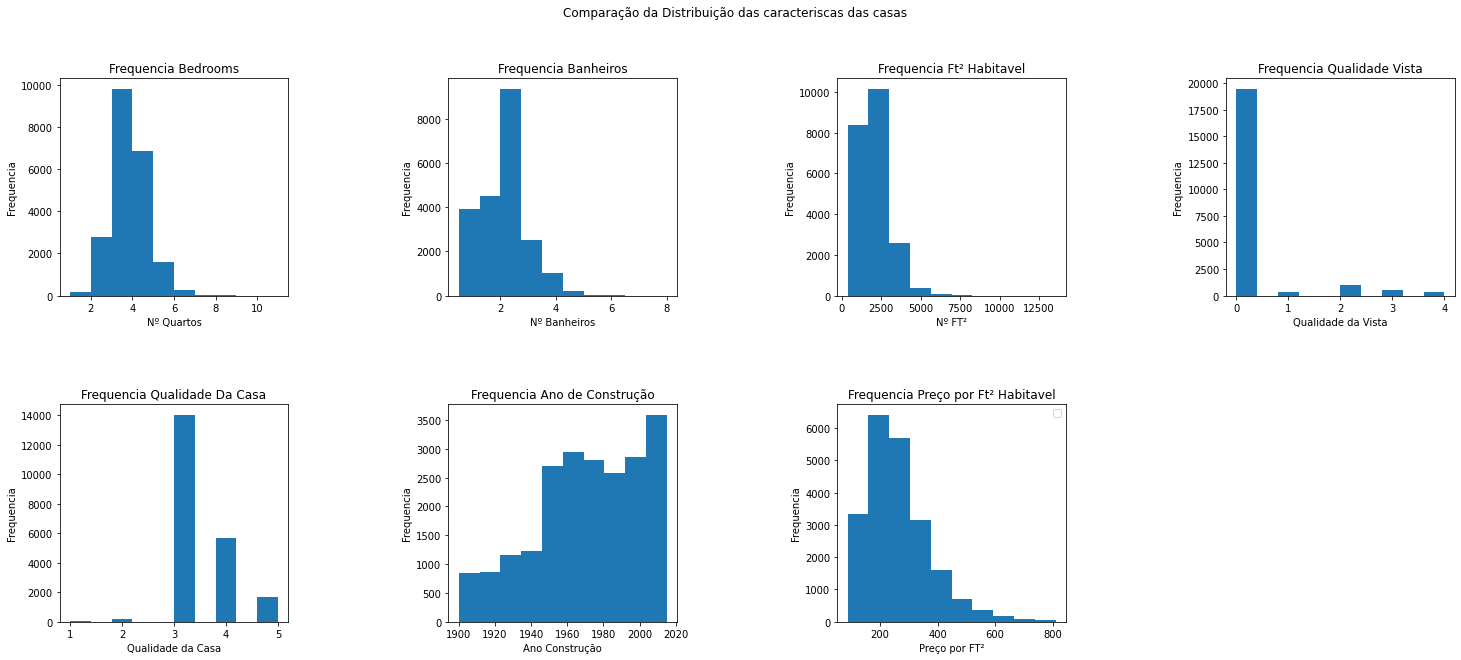

In [404]:
#Primeiramente devemos iremos verificar a Frequencia de alguns dados dos imóveis e ver as suas distribuições
fig = plt.figure(figsize = (25,10))

plt.subplots_adjust(hspace = 0.5, wspace = 0.7)
fig.suptitle("Comparação da Distribuição das caracteriscas das casas")

bedrooms = fig.add_subplot(2,4,1)
bathrooms = fig.add_subplot(2,4,2)
sqft_living = fig.add_subplot(2,4,3)
view = fig.add_subplot(2,4,4)
condition = fig.add_subplot(2,4,5)
year = fig.add_subplot(2,4,6)
price_livft = fig.add_subplot(2,4,7) 

# Histogramas

bedrooms.hist(df['bedrooms'], bins = 10)
bedrooms.set_xlabel('Nº Quartos')
bedrooms.set_ylabel('Frequencia')
bedrooms.set_title('Frequencia Bedrooms')

bathrooms.hist(df['bathrooms'], bins = 10)
bathrooms.set_xlabel('Nº Banheiros')
bathrooms.set_ylabel('Frequencia')
bathrooms.set_title('Frequencia Banheiros')

sqft_living.hist(df['sqft_living'], bins = 10)
sqft_living.set_xlabel('Nº FT²')
sqft_living.set_ylabel('Frequencia')
sqft_living.set_title('Frequencia Ft² Habitavel')


view.hist(df['view'], bins = 10)
view.set_xlabel('Qualidade da Vista')
view.set_ylabel('Frequencia')
view.set_title('Frequencia Qualidade Vista')


condition.hist(df['condition'], bins = 10)
condition.set_xlabel('Qualidade da Casa')
condition.set_ylabel('Frequencia')
condition.set_title('Frequencia Qualidade Da Casa')

year.hist(df['yr_built'], bins = 10)
year.set_xlabel('Ano Construção')
year.set_ylabel('Frequencia')
year.set_title('Frequencia Ano de Construção')

price_livft.hist(df['price_sqft_living'], bins = 10)
price_livft.set_xlabel('Preço por FT²')
price_livft.set_ylabel('Frequencia')
price_livft.set_title('Frequencia Preço por Ft² Habitavel')




plt.legend()





In [405]:
# Após analisarmos onde se encontra a maioria das frequencias dos dados dos imóveis, iremos verificar a correlação das variaveis

#Aqui iremos buscar a correlação entre os campos
matriz_corr = matriz_corr.corr()

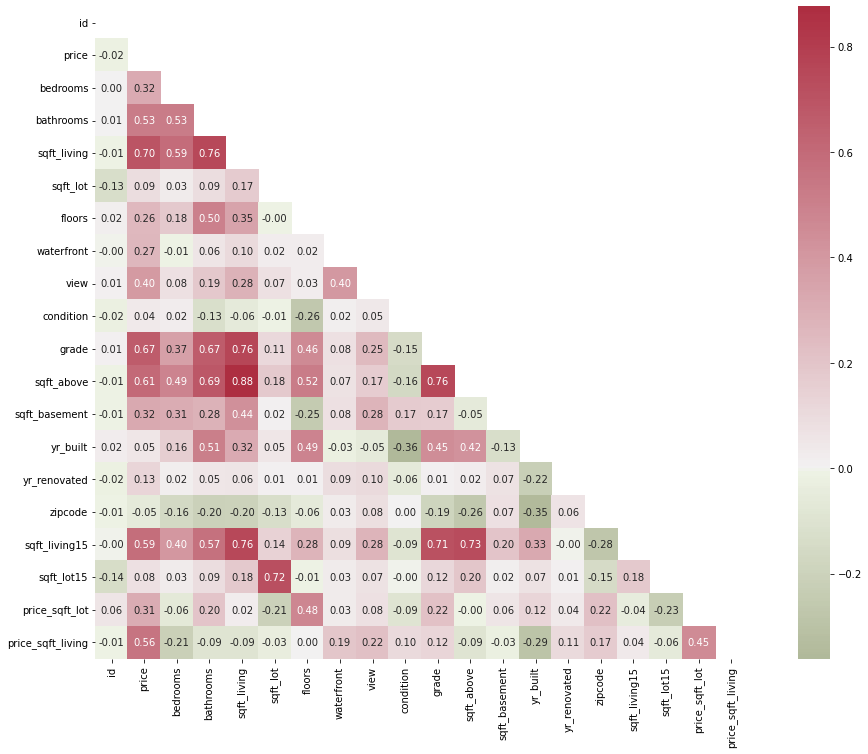

In [406]:


# Create a mask
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

plt.figure(figsize=(18, 12))
sns.heatmap(matriz_corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.show();

In [407]:
# Agora iremos extrair a corelação das colunas com o PRICE

corr_price = df.corr()

corr_price['price'].sort_values(ascending = False).round(3)

price                1.000
sqft_living          0.702
grade                0.668
sqft_above           0.605
sqft_living15        0.585
price_sqft_living    0.556
bathrooms            0.526
view                 0.397
sqft_basement        0.324
bedrooms             0.316
price_sqft_lot       0.308
lat                  0.307
waterfront           0.266
floors               0.257
yr_renovated         0.126
sqft_lot             0.090
sqft_lot15           0.083
yr_built             0.054
condition            0.036
long                 0.022
id                  -0.017
zipcode             -0.053
Name: price, dtype: float64

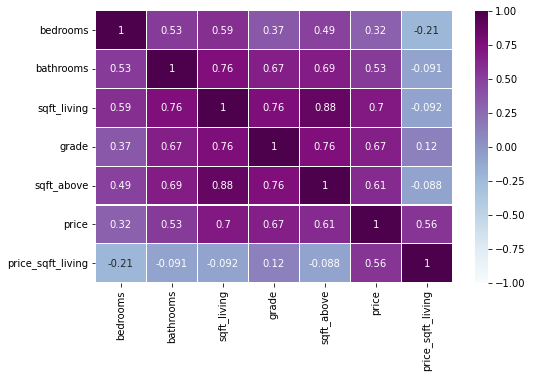

In [408]:
# Agora iremos avaliar melhor as colunas que possuem mais relação com o PRICE conforme a lista acima
colunas_corr = df[['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'price', 'price_sqft_living']]

corr_price = colunas_corr.corr()

#Agora Plotamos o gráfico de heatmap
plt.figure(figsize=(8,5))

sns.heatmap(annot = True, data = corr_price, vmin = -1, vmax = 1, linewidth = 0.2, cmap = 'BuPu')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

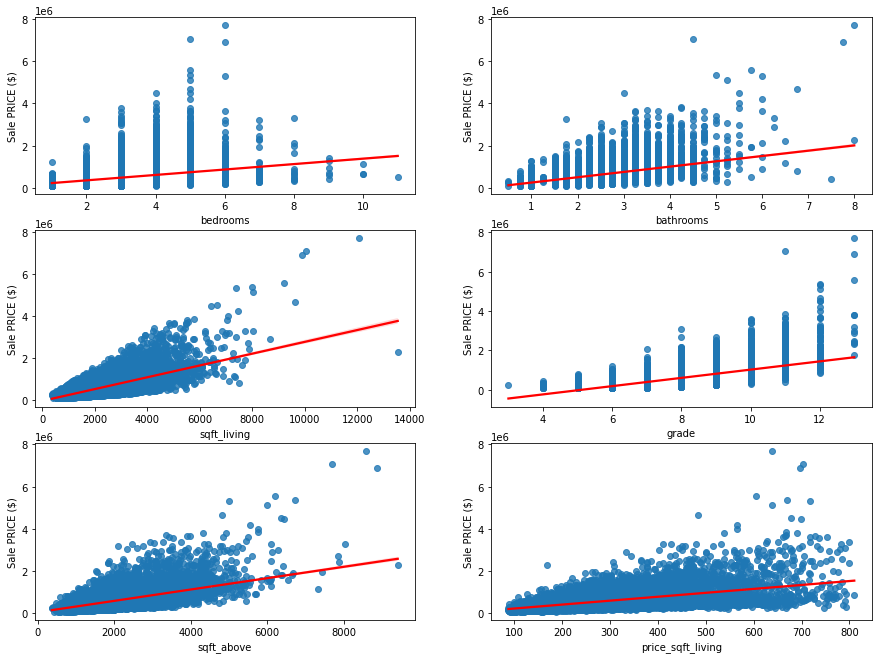

In [409]:
# Através deste novo Heatmap, iremos verificar as variáveis que podem aumentar o preço do imóvel e com como o aumento de tal variavel influencia no PRICE
i = 1
plt.figure(figsize=[15, 15])
for col in colunas_corr:
    if col == 'price':
        continue
    plt.subplot(4, 2, i)
    sns.regplot(df[col], df['price'], line_kws={'color': 'r'})
    plt.xlabel(col)
    plt.ylabel('Sale PRICE ($)')
    i+=1

Com essa Análise acima, podemos verificar que:


1.   As Casas com o maior valor de Venda Possuem **4-6 Quartos**
2.   As Casas com até **4 banheiros** possuem uma relação de preço mais 
3.   As Casas com até **5.000ft²** possuem uma melhor volatividade no preço
4.   As Casas com ft² Acima do solo possui uma influência positiva e uma menor dispersão em até **4000ft²**
5.   As Casas possuem uma boa influência com até **$400/ft²**, após esse valor a dispersão é alta








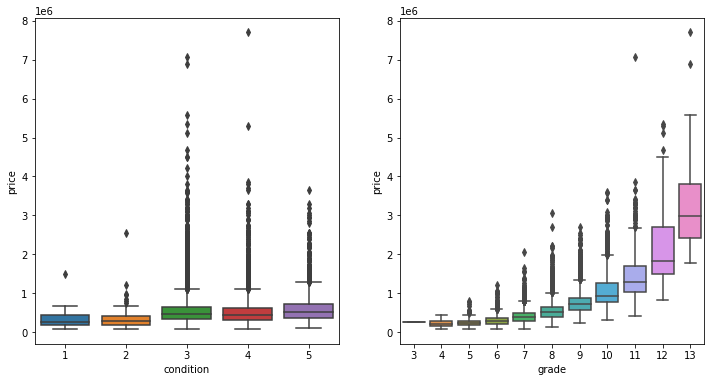

In [410]:
fig = plt.figure(figsize = [12,6])

plt.subplot(121)
sns.boxplot(x='condition', y='price', data=df);
plt.subplot(122)
sns.boxplot(data = df, x = 'grade', y = 'price')



**Verificação da Condição x Preço & Qualidade x Price**

1.   Podemos verificar que a MEDIANA dos Preços com relação a Condition(Condição) da Casa há pouca variação, porém há muitos outliers quando a Condição da casa é de "Mediana" para "Boa"
2.   A variavel grade influencia positivamente no preço de venda da Casa, embora que haja muitos outilers das grades de 5 até 11, a qualidade da Casa aumenta a mediana do valor conforme a grade da casa



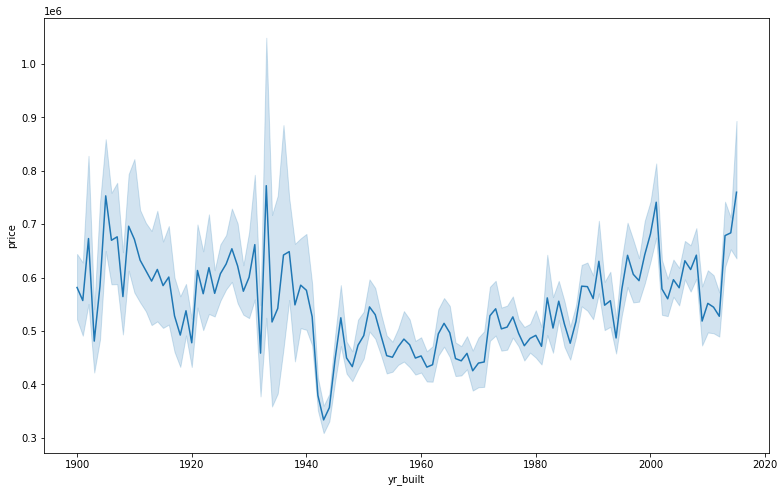

In [411]:
plt.figure(figsize=(13,8))

sns.lineplot(x = df['yr_built'], y = df['price'])
plt.show()

Ao analisarmos o valor de venda de Cada imóvel conforme o ano de construção do mesmo, conseguimos verificar que as casas construídas no final da década de **30** e as construídas no inicio década de **40** possuem uma forte desvalorização e as casas construídas partir das década de **70**, as mesmas começam a ser valorizadas

In [412]:
# Neste ponto iremos criar uma nova coluna para separmos em grupos a qualidade do material das casas
# E considerarmos o seguinte valor:

# 1-3 = Bad
# 4-6 = Average
# 7-10 = Good
# 11-13 = Very Good

grades = pd.DataFrame(df['grade'], columns = ['grade'])

bins = [0, 3, 6, 10, 13]
labels = ['Bad', 'Average', 'Good', 'Very Good']

df['grade_quality'] = pd.cut(grades['grade'], bins, labels = labels, include_lowest=True)
df.sample(5)




,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,city,sqft_living15,sqft_lot15,price_sqft_lot,price_sqft_living,grade_quality
9850,7805450560,2014-08-20,960000.0,4,2.5,3110,11397,2.0,0,3,...,0,98006,47.5623,-122.106,Bellevue,3110,11586,84.23,308.68,Good
19618,1025039326,2014-08-28,921800.0,4,2.5,2950,7024,2.0,0,0,...,0,98199,47.6651,-122.403,Seattle,2950,6339,131.24,312.47,Good
12010,7852130640,2014-06-02,432500.0,3,2.5,2240,6396,2.0,0,0,...,0,98065,47.5356,-121.881,Snoqualmie,2610,5128,67.62,193.08,Good
10208,4219400465,2015-01-12,950000.0,4,2.0,2490,4600,1.5,0,2,...,0,98105,47.6557,-122.278,Seattle,2910,5000,206.52,381.53,Good
1799,7805460030,2015-02-23,615000.0,3,2.5,2250,10171,2.0,0,0,...,0,98006,47.5613,-122.110,Bellevue,2440,13390,60.47,273.33,Good


In [413]:
sample_df = df[['grade', 'grade_quality']]

sample_df.value_counts()

grade  grade_quality
7      Good             8973
8      Good             6065
9      Good             2615
6      Average          2038
10     Good             1134
11     Very Good         399
5      Average           242
12     Very Good          89
4      Average            27
13     Very Good          13
3      Bad                 1
dtype: int64

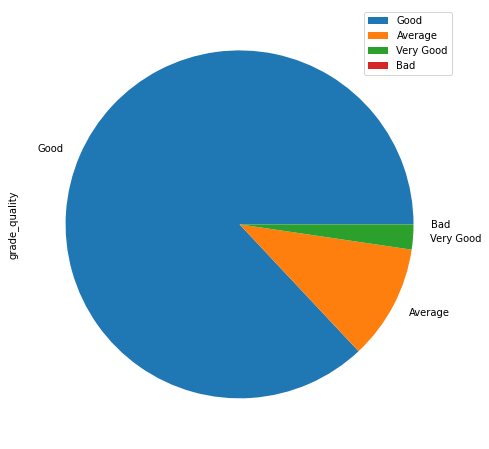

In [414]:
sample_df = df['grade_quality']

fig = plt.figure(figsize=(10,8))

sample_df.value_counts().plot.pie()
plt.legend()

Com o Gráfico e a listagem acima, podemos mensurar a quantia de casas pela qualidade do material utilizado

In [415]:
# Agora iremos criar mais uma coluna para diferenciarmos as casas que foram reformadas das que não foram.

df = df.assign(reformed = (df['yr_renovated'] > 0).astype(int))

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,city,sqft_living15,sqft_lot15,price_sqft_lot,price_sqft_living,grade_quality,reformed
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,Seattle,1340,5650,39.27,188.05,Good,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,Seattle,1690,7639,74.29,209.34,Good,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,Kenmore,2720,8062,18.00,233.77,Average,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,Seattle,1360,5000,120.80,308.16,Good,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,Sammamish,1800,7503,63.12,303.57,Good,0


In [416]:
# Agora iremos verificar a quantia de CASAS REFORMADAS x NÃO REFORMADAS

house_reformed = df.groupby('reformed')['price'].count()
house_reformed

reformed
0    20682
1      914
Name: price, dtype: int64

In [417]:
# Agora iremos verificar a MEDIANA de CASAS REFORMADAS x NÃO REFORMADAS

reformed_median = df.groupby('reformed')['price'].agg('median')

reformed_median

reformed
0    448000.0
1    600000.0
Name: price, dtype: float64

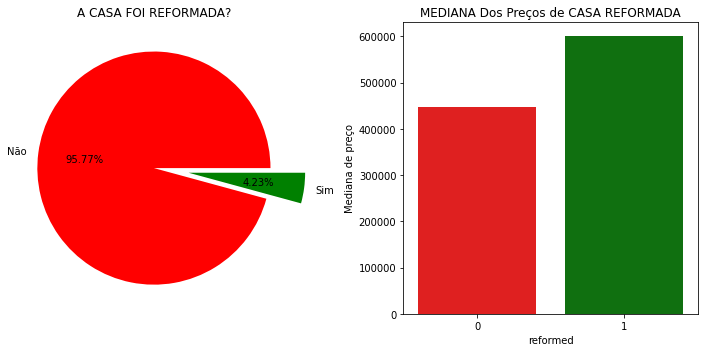

In [418]:
plt.figure(figsize=(10, 5))
        
plt.subplot(1, 2, 1)
plt.pie(house_reformed, explode = (0, 0.3), colors=['r', 'g'], labels= ['Não', 'Sim'], autopct='%1.2f%%')
plt.title('A CASA FOI REFORMADA?')

plt.subplot(1, 2, 2)
sns.barplot(x=house_reformed.index, y = reformed_median, palette=['r', 'g'])
plt.title('MEDIANA Dos Preços de CASA REFORMADA')
plt.ylabel('Mediana de preço')

plt.tight_layout()
plt.show()

In [419]:
grade_median = df.groupby('grade_quality')['price'].median()

grade_median

grade_quality
Bad           262000.0
Average       270000.0
Good          472000.0
Very Good    1415000.0
Name: price, dtype: float64

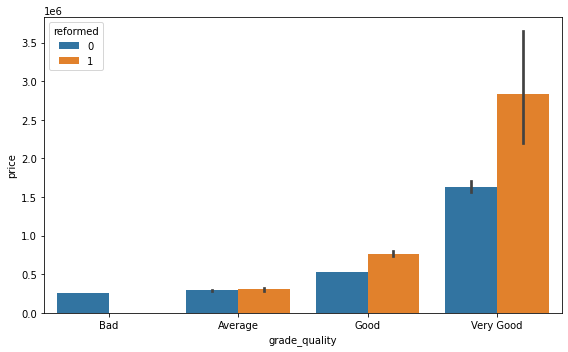

In [420]:
grade_reformed_median = df.groupby(['grade_quality', 'reformed'])['price'].median().reset_index()

fig = plt.figure(figsize=(8,5))

sns.barplot(data=df, x='grade_quality', y='price', hue='reformed')
plt.tight_layout()
plt.show()

#4.0 - Filtrando o Resultado FINAL PARA INVESTIMENTO

In [421]:
wrost_df = df

##4.1 - Os melhores Imóveis para Investimento

In [422]:
# Com base nesses estudos, iremos aplicar os filtros necessários para buscarmos as 5 melhores opções de investimento

# Primeiro Passo, Iremos buscar conforme o gráfico as casas que tenham sido construídas a partir do ano de 1995, onde houve uma queda na média dos valores e posteriormente o valor de venda aumento
filtred_df = df[df['yr_built'] >= 1995]


In [423]:
# Segundo Passo buscar as casas que não foram reformadas, visto que quando feita a reforma, a mesma tende a se valorizar posteriormente
filtred_df = filtred_df[filtred_df['reformed'] == 0]

In [424]:
# Terceiro, iremos filtrar pelas casas com o grau de material GOOD, pois o mesmo apresenta um bom aumento no preço de venda e com baixa volatividade no preço após a venda da casa com reforma
filtred_df = filtred_df[filtred_df['grade_quality'] == 'Good']

In [425]:
# Quarto, conforme verificamos antes, as casas com 4-6 banheiros tendem a possuir os melhores preços de venda

filtred_df = filtred_df[(filtred_df['bedrooms'] == 4)]

In [426]:
# Quinto, conforme verificamos antes, as casas com 3 banheiros tendem a possuir os melhores preços de venda

filtred_df = filtred_df[(filtred_df['bathrooms'] == 3.0)]

In [427]:
# Sexto, conforme verificamos antes, as casas com até 2 andares tendem a possuir os melhores preços de venda

filtred_df = filtred_df[(filtred_df['floors'] <= 2.0)]

In [428]:
# Sétimo, conforme verificamos antes, as casas com até 3.000ft² acima do solo tendem a possuir os melhores preços de venda
filtred_above_q25 = np.quantile(filtred_df['sqft_above'], 0.25)
filtred_above_q75 = np.quantile(filtred_df['sqft_above'], 0.75)
filtred_df = filtred_df[(filtred_df['sqft_above'] >= filtred_above_q25)]
filtred_df = filtred_df[(filtred_df['sqft_above'] <= filtred_above_q75)]


In [429]:
# Oitavo, conforme verificamos antes, as casas com até $400/ft² tendem a possuir os melhores preços de venda
# Neste caso, iremos buscar os valores entre os Quartis 25 e 75
filtred_ft2_q25 = np.quantile(filtred_df['price_sqft_living'], 0.25)
filtred_ft2_q75 = np.quantile(filtred_df['price_sqft_living'], 0.75)
filtred_df = filtred_df[(filtred_df['price_sqft_living'] >= filtred_ft2_q25)]
filtred_df = filtred_df[(filtred_df['price_sqft_living'] <= filtred_ft2_q75)]

In [430]:
# Nono, Pegaremos a mediana do PRICE e iremos aplicar no filtro para pegar os melhores resultados
# Neste caso, iremos buscar os valores entre os Quartis 25 e 75
filtred_price_q25 = np.quantile(filtred_df['price'], 0.25)
filtred_price_q75 = np.quantile(filtred_df['price'], 0.75)
filtred_df = filtred_df[(filtred_df['price'] >= filtred_price_q25)]
filtred_df = filtred_df[(filtred_df['price'] <= filtred_price_q75)]

In [431]:
# Resultado das 5 melhores opções para INVESTIMENTO
filtred_df.reset_index(drop = True)

filtred_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,city,sqft_living15,sqft_lot15,price_sqft_lot,price_sqft_living,grade_quality,reformed
1227,5104511600,2014-11-12,457000.0,4,3.0,2800,7845,2.0,0,0,...,98038,47.3544,-122.013,Maple Valley,2800,6977,58.25,163.21,Good,0
1889,2314300200,2014-10-21,449500.0,4,3.0,2580,7299,2.0,0,0,...,98058,47.4646,-122.150,Renton,2250,6165,61.58,174.22,Good,0
2391,5104511840,2014-08-27,449950.0,4,3.0,2800,6977,2.0,0,0,...,98038,47.3542,-122.014,Maple Valley,2800,6600,64.49,160.70,Good,0
4709,5104512070,2015-04-20,412000.0,4,3.0,2430,7242,2.0,0,0,...,98038,47.3533,-122.015,Maple Valley,2430,7242,56.89,169.55,Good,0
7236,5104511630,2014-08-12,444000.0,4,3.0,2800,7198,2.0,0,0,...,98038,47.3538,-122.013,Maple Valley,3610,7845,61.68,158.57,Good,0
11206,5104510860,2015-05-06,425000.0,4,3.0,2430,5502,2.0,0,0,...,98038,47.3560,-122.014,Maple Valley,2000,5702,77.24,174.90,Good,0
14431,5104512060,2014-12-12,410000.0,4,3.0,2430,7243,2.0,0,0,...,98038,47.3533,-122.016,Maple Valley,2430,7084,56.61,168.72,Good,0
16255,3303860630,2015-04-27,454450.0,4,3.0,2810,6000,2.0,0,0,...,98038,47.3689,-122.057,Maple Valley,2790,6000,75.74,161.73,Good,0
16747,6669080020,2014-12-26,449400.0,4,3.0,2490,5064,2.0,0,0,...,98056,47.5139,-122.189,Renton,2470,5064,88.74,180.48,Good,0
19612,5714200140,2015-04-22,421500.0,4,3.0,2793,5703,2.0,0,0,...,98030,47.3682,-122.178,kent,2793,5704,73.91,150.91,Good,0


In [432]:
filtred_df = filtred_df[filtred_df['grade'] > 7]

filtred_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,city,sqft_living15,sqft_lot15,price_sqft_lot,price_sqft_living,grade_quality,reformed
1227,5104511600,2014-11-12,457000.0,4,3.0,2800,7845,2.0,0,0,...,98038,47.3544,-122.013,Maple Valley,2800,6977,58.25,163.21,Good,0
1889,2314300200,2014-10-21,449500.0,4,3.0,2580,7299,2.0,0,0,...,98058,47.4646,-122.150,Renton,2250,6165,61.58,174.22,Good,0
2391,5104511840,2014-08-27,449950.0,4,3.0,2800,6977,2.0,0,0,...,98038,47.3542,-122.014,Maple Valley,2800,6600,64.49,160.70,Good,0
4709,5104512070,2015-04-20,412000.0,4,3.0,2430,7242,2.0,0,0,...,98038,47.3533,-122.015,Maple Valley,2430,7242,56.89,169.55,Good,0
7236,5104511630,2014-08-12,444000.0,4,3.0,2800,7198,2.0,0,0,...,98038,47.3538,-122.013,Maple Valley,3610,7845,61.68,158.57,Good,0
11206,5104510860,2015-05-06,425000.0,4,3.0,2430,5502,2.0,0,0,...,98038,47.3560,-122.014,Maple Valley,2000,5702,77.24,174.90,Good,0
14431,5104512060,2014-12-12,410000.0,4,3.0,2430,7243,2.0,0,0,...,98038,47.3533,-122.016,Maple Valley,2430,7084,56.61,168.72,Good,0
16255,3303860630,2015-04-27,454450.0,4,3.0,2810,6000,2.0,0,0,...,98038,47.3689,-122.057,Maple Valley,2790,6000,75.74,161.73,Good,0
19612,5714200140,2015-04-22,421500.0,4,3.0,2793,5703,2.0,0,0,...,98030,47.3682,-122.178,kent,2793,5704,73.91,150.91,Good,0


###4.1.1 - As 5 melhores Opções

In [433]:
# Os 2 melhores oções

df_2best = filtred_df[filtred_df['grade'] == 9]
df_2best

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,city,sqft_living15,sqft_lot15,price_sqft_lot,price_sqft_living,grade_quality,reformed
16255,3303860630,2015-04-27,454450.0,4,3.0,2810,6000,2.0,0,0,...,98038,47.3689,-122.057,Maple Valley,2790,6000,75.74,161.73,Good,0
19612,5714200140,2015-04-22,421500.0,4,3.0,2793,5703,2.0,0,0,...,98030,47.3682,-122.178,kent,2793,5704,73.91,150.91,Good,0


In [434]:
df_3best = filtred_df[filtred_df['yr_built'] == 2003]

df_3best

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,city,sqft_living15,sqft_lot15,price_sqft_lot,price_sqft_living,grade_quality,reformed
2391,5104511840,2014-08-27,449950.0,4,3.0,2800,6977,2.0,0,0,...,98038,47.3542,-122.014,Maple Valley,2800,6600,64.49,160.70,Good,0
4709,5104512070,2015-04-20,412000.0,4,3.0,2430,7242,2.0,0,0,...,98038,47.3533,-122.015,Maple Valley,2430,7242,56.89,169.55,Good,0
14431,5104512060,2014-12-12,410000.0,4,3.0,2430,7243,2.0,0,0,...,98038,47.3533,-122.016,Maple Valley,2430,7084,56.61,168.72,Good,0


##4.2 - Os Piores imóveis para Investimento

Agora iremos analisar os 5 piores imóveis para investimento

Com base nas análises, os piores imóveis estão nos seguintes quesitos:



1.   Casas com mais de 5 quartos
1.   Casas com mais de 5 banheiros
2.   Casas com área habitavel acima de 8500ft²
1.   Casas com o sqft Above acima de 5000ft²
1.   Casas com o preço por ft² Acima de$ 300/ft²




In [435]:
wrost_df = wrost_df[wrost_df['bedrooms'] >= 5 ]

wrost_df = wrost_df[wrost_df['bathrooms'] >= 5 ]

wrost_df = wrost_df[wrost_df['reformed'] == 1 ]

wrost_df = wrost_df[wrost_df['price_sqft_living'] >= 300 ]

wrost_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,city,sqft_living15,sqft_lot15,price_sqft_lot,price_sqft_living,grade_quality,reformed
7245,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,98102,47.6298,-122.323,Seattle,3940,8800,278.99,639.00,Very Good,1
7900,1068000375,2014-09-23,3200000.0,6,5.00,7100,18200,2.5,0,0,...,98199,47.6427,-122.408,Seattle,3130,6477,175.82,450.70,Very Good,1
8085,1924059029,2014-06-17,4668000.0,5,6.75,9640,13068,1.0,1,4,...,98040,47.5570,-122.210,Macer Island,3270,10454,357.21,484.23,Very Good,1
14542,2303900035,2014-06-11,2888000.0,5,6.25,8670,64033,2.0,0,4,...,98177,47.7295,-122.372,Seattle,4140,81021,45.10,333.10,Very Good,1
15578,5093300280,2014-07-09,1681000.0,5,5.25,4830,18707,2.0,0,1,...,98040,47.5858,-122.247,Macer Island,2880,10520,89.86,348.03,Good,1
